In [ ]:
OBJECTIVE
This project performs data analysis and machine learning on an insurance dataset to understand the factors affecting annual medical insurance charges and to build predictive regression models.

The project covers:
Data loading and cleaning
Exploratory Data Analysis (EDA)
Feature impact analysis
Linear Regression (single & multiple variables)
Ridge Regression for model refinement

Dataset Description
Parameter	Description	Data Type
age	Age of the insured person (years)	Integer
gender	Male or Female (1 = Male, 2 = Female)	Integer
bmi	Body Mass Index	Float
no_of_children	Number of children	Integer
smoker	Smoking status (0 = No, 1 = Yes)	Integer
region	US region (1 = NW, 2 = NE, 3 = SW, 4 = SE)	Integer
charges	Annual insurance charges (USD)	Float

Objectives
Load the insurance dataset into a pandas DataFrame
Clean missing or inconsistent values
Perform Exploratory Data Analysis (EDA)
Identify features that significantly affect insurance charges

Build:

Single-variable Linear Regression model
Multi-variable Linear Regression model
Improve model performance using Ridge Regression

In [2]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'
df = pd.read_csv(filepath,header=None)
df.head(4)


,0,1,2,3,4,5,6
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061


In [3]:
#add the headers to the dataframe
headers = ["age", "gender", "bmi", "no_of_children", "smoker", "region", "charges"]
df.columns = headers
df.head(3)

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.90,0,1,3,16884.9240
1,18,2,33.77,1,0,4,1725.5523
2,28,2,33.00,3,0,4,4449.4620


In [4]:
# checking the missing values 
df.isnull().sum()

age               0
gender            0
bmi               0
no_of_children    0
smoker            0
region            0
charges           0
dtype: int64

In [5]:
df.replace('?', np.nan, inplace = True)
df

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
2767,47,1,45.320,1,0,4,8569.86180
2768,21,1,34.600,0,0,3,2020.17700
2769,19,2,26.030,1,1,1,16450.89470
2770,23,2,18.715,0,0,1,21595.38229


Handle missing data:

For continuous attributes (e.g., age), replace missing values with the mean.
For categorical attributes (e.g., smoker), replace missing values with the most frequent value.
Update the data types of the respective columns.
Verify the update using df.info().

In [6]:
df['age'].dtype
df['age']=pd.to_numeric(df['age'])
df['age'].dtype
df['age'].fillna(df['age'].mean(), inplace=True)
df['smoker'].fillna(df['smoker'].mode()[0], inplace=True)
df['smoker'] = df['smoker'].astype('category')
df.isnull().sum()

age               0
gender            0
bmi               0
no_of_children    0
smoker            0
region            0
charges           0
dtype: int64

In [54]:
#Update the charges column such that all values are rounded to nearest 2 decimal places.
#Verify conversion by printing the first 5 values of the updated dataframe.
df[["charges"]] = np.round(df[["charges"]],2)
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,19.0,1,27.900,0,1,3,16884.92
1,18.0,2,33.770,1,0,4,1725.55
2,28.0,2,33.000,3,0,4,4449.46
3,33.0,2,22.705,0,0,1,21984.47
4,32.0,2,28.880,0,0,1,3866.86


###Task 3 : Exploratory Data Analysis (EDA)

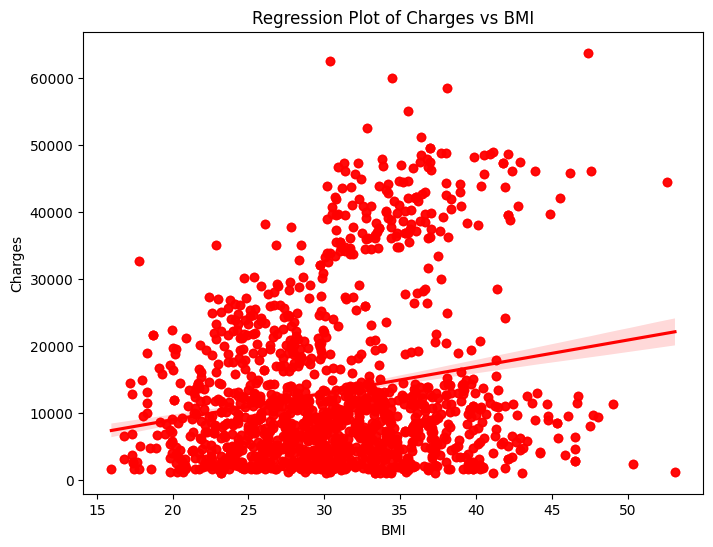

In [30]:
# Regression plot for charges with respect to bmi
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.regplot(x='bmi', y='charges', data=df,color='red')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('Regression Plot of Charges vs BMI')
plt.show()




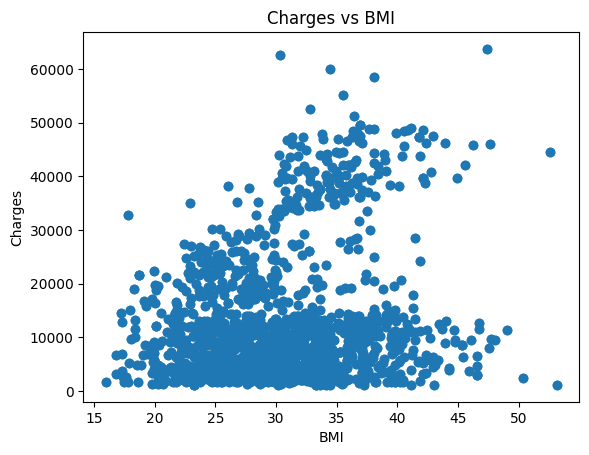

In [31]:
# WE can do it with only matplotlib usign scatter
plt.scatter(df['bmi'], df['charges'])
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('Charges vs BMI')
plt.show()


Text(0, 0.5, 'age')

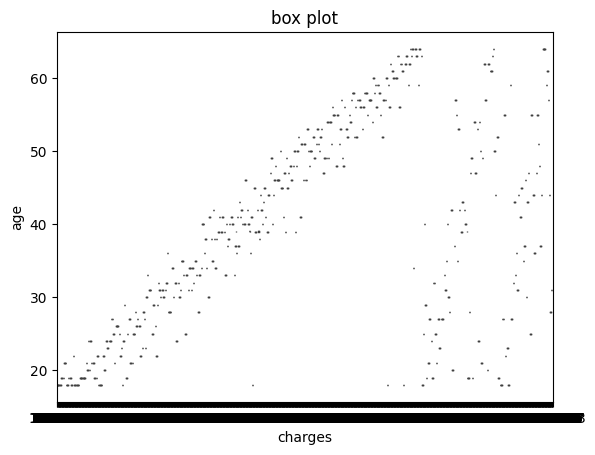

In [34]:
#Implement the box plot for charges with respect to smoker.
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x=df['charges'],y=df['age'])
plt.title('box plot')
plt.xlabel('charges')
plt.ylabel('age')

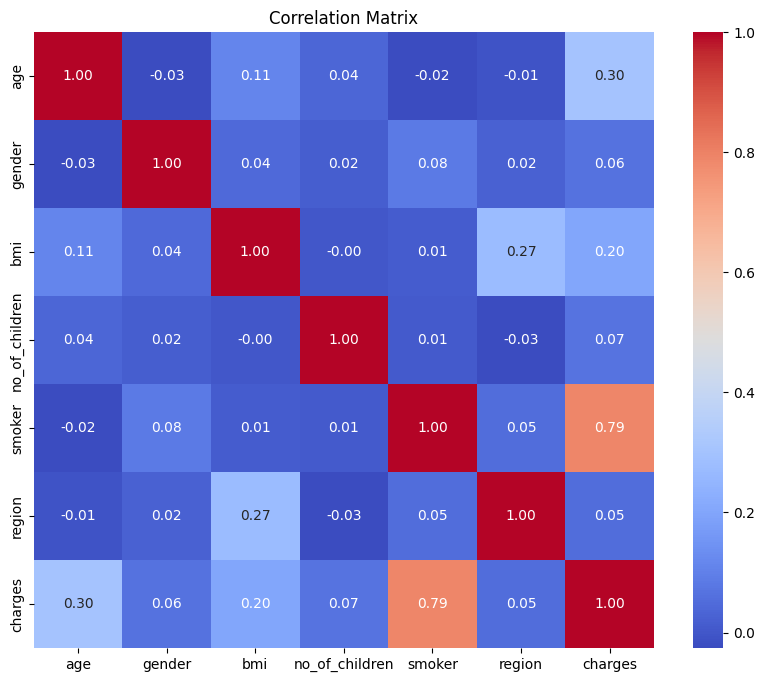

In [38]:
#Print the correlation matrix for the dataset.
corr_matrix=df.corr()
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


### Model Development

In [7]:
# plot linear regression model that may be used to predict the charges value.
!pip install scikit-learn
import pandas as pd
from sklearn.linear_model import LinearRegression

print(df.columns)



Index(['age', 'gender', 'bmi', 'no_of_children', 'smoker', 'region',
       'charges'],
      dtype='object')



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
df

,age,gender,bmi,no_of_children,smoker,region,charges
0,19.0,1,27.900,0,1,3,16884.92400
1,18.0,2,33.770,1,0,4,1725.55230
2,28.0,2,33.000,3,0,4,4449.46200
3,33.0,2,22.705,0,0,1,21984.47061
4,32.0,2,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
2767,47.0,1,45.320,1,0,4,8569.86180
2768,21.0,1,34.600,0,0,3,2020.17700
2769,19.0,2,26.030,1,1,1,16450.89470
2770,23.0,2,18.715,0,0,1,21595.38229


In [9]:
print(df.columns)

Index(['age', 'gender', 'bmi', 'no_of_children', 'smoker', 'region',
       'charges'],
      dtype='object')


In [10]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# CLEAN COLUMN NAME 

df.columns = df.columns.str.strip().str.lower()

#  HANDLE SMOKER COLUMN SAFELY
if df['smoker'].dtype == 'object':
    df['smoker'] = df['smoker'].str.lower().map({'yes': 1, 'no': 0})

# Fill missing values
df['smoker'] = df['smoker'].fillna(df['smoker'].mode()[0])

# Ensure numeric
df['smoker'] = df['smoker'].astype(int)

# BUILD MODEL
X = df[['smoker']]   # 2D
y = df['charges']

model = LinearRegression()
model.fit(X, y)

print("R² score:", model.score(X, y))


R² score: 0.6221791718835359


In [14]:
#Split the data into training and testing subsets, assuming that 20% of the data will be reserved for testing.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [16]:
#Initialize a Ridge regression model with alpha = 0.1. Fit the model using the training data and print the R² score for the testing data.
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

print("R² score (Ridge Regression):", ridge_model.score(X_test, y_test))


R² score (Ridge Regression): 0.5991181845003428


In [18]:
#Apply polynomial transformation (degree = 2) to the training parameters. 
#Use this transformed feature set to fit the same Ridge regression model.
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

poly_ridge_model = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('ridge', Ridge(alpha=0.1))])

poly_ridge_model.fit(X_train, y_train)

print("R² score (Polynomial Ridge Regression):",
      poly_ridge_model.score(X_test, y_test))


R² score (Polynomial Ridge Regression): 0.5991348465028701


In [2]:
df


NameError: name 'df' is not defined